In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv("D:\桌面\metirals\MMO\china_population.csv")

In [3]:
data.head()

,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,China Global Rank
0,2020,1439323776,0.39,5540090,-348399,38.4,1.69,153,60.8,875075919,18.47,7794798739,1
1,2019,1433783686,0.43,6135900,-348399,37.0,1.65,153,59.7,856409297,18.59,7713468100,1
2,2018,1427647786,0.47,6625995,-348399,37.0,1.65,152,58.6,837022095,18.71,7631091040,1
3,2017,1421021791,0.49,6972440,-348399,37.0,1.65,151,57.5,816957613,18.83,7547858925,1
4,2016,1414049351,0.51,7201481,-348399,37.0,1.65,151,56.3,796289491,18.94,7464022049,1


In [4]:
data.isnull().sum()

Year                            0
Population                      0
Yearly % Change                 0
Yearly Change                   0
Migrants (net)                  0
Median Age                      0
Fertility Rate                  0
Density (P/Km²)                 0
Urban Pop %                     0
Urban Population                0
Country's Share of World Pop    0
World Population                0
China Global Rank               0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          18 non-null     int64  
 1   Population                    18 non-null     int64  
 2   Yearly % Change               18 non-null     float64
 3   Yearly Change                 18 non-null     int64  
 4   Migrants (net)                18 non-null     int64  
 5   Median Age                    18 non-null     float64
 6   Fertility Rate                18 non-null     float64
 7   Density (P/Km²)               18 non-null     int64  
 8   Urban Pop %                   18 non-null     float64
 9   Urban Population              18 non-null     int64  
 10  Country's Share of World Pop  18 non-null     float64
 11  World Population              18 non-null     int64  
 12  China Global Rank             18 non-null     int64  
dtypes: floa

In [6]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

Оптимальное значение λ = -0.7511122830641473


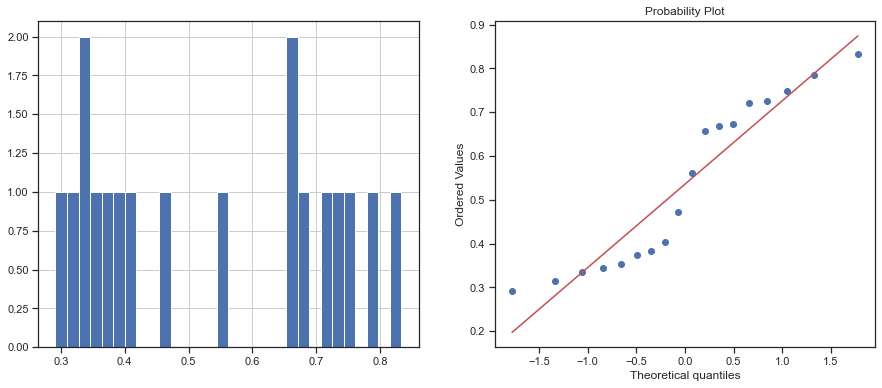

In [7]:
# Необходимо преобразовать данные к действительному типу
data['Yearly % Change_yeojohnson'], param = stats.yeojohnson(data['Yearly % Change']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'Yearly % Change_yeojohnson')

<AxesSubplot:xlabel='Yearly % Change'>

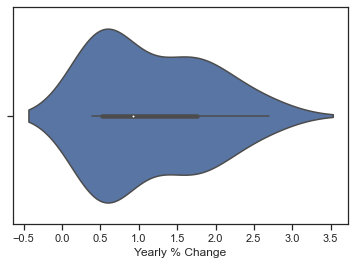

In [8]:
sns.violinplot(x=data['Yearly % Change'])

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")

In [12]:
iris = load_iris()
iris_X = iris.data
iris_y = iris.target
iris_feature_names = iris['feature_names']
iris_x_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

In [14]:
boston = load_boston()
boston_X = boston.data
boston_y = boston.target
boston_feature_names = boston['feature_names']
boston_x_df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

Text(0, 0.5, 'Взаимная информация')

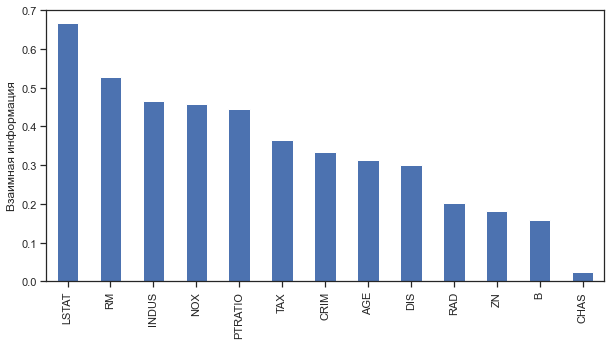

In [15]:
mi = mutual_info_regression(boston_X, boston_y)
mi = pd.Series(mi)
mi.index = boston_feature_names
mi.sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.ylabel('Взаимная информация')

In [18]:
sel_mi = SelectPercentile(mutual_info_regression, percentile=5).fit(boston_X, boston_y)

list(zip(boston_feature_names, sel_mi.get_support()))

[('CRIM', False),
 ('ZN', False),
 ('INDUS', False),
 ('CHAS', False),
 ('NOX', False),
 ('RM', False),
 ('AGE', False),
 ('DIS', False),
 ('RAD', False),
 ('TAX', False),
 ('PTRATIO', False),
 ('B', False),
 ('LSTAT', True)]